In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [3]:
# #### load data
# with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
#     omc_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
#     omc_countN = pickle.load(f)

    #### load data
with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
    aca_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
    aca_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
aca_clean = [clean_up_data(df, to_drop=['OB', 'OMCi', 'OMCc', 'HIP'], inj_site="ACAi") for df in aca_bin]
aca_type = [sort_by_celltype(df, it_areas=['ACAc', "AUD", "STR"]) for df in aca_clean]
aca_preprocess = dfs_preprocess_counts(aca_type, drop=['ACAi', "type"]) # normalize by dataset median

# countN processing
aca_cleanN = [clean_up_data(df, to_drop=['OB', 'OMCi', 'OMCc', 'HIP'], inj_site="ACAi") for df in aca_countN]
aca_typeN = [sort_by_celltype(df, it_areas=['ACAc', "AUD", "STR"]) for df in aca_cleanN]
aca_preprocessN = dfs_preprocess_counts(aca_typeN, drop=['ACAi', "type"]) # normalize by dataset median



/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/

# Heatmaps

## individual animal

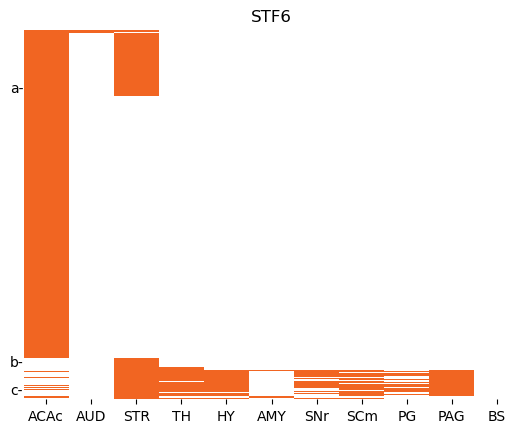

IndexError: single positional indexer is out-of-bounds

<Figure size 640x50 with 0 Axes>

In [20]:
# plot STF6 only, mice[10]
i=10
sort_order = ["type", 'ACAc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":400, "b":2300, "c":2500}
sorted_heatmap(aca_preprocess[i], sort_by=[], title=mice[i], drop=["ACAi", "type"],
               label_neurons=neurons)
plt.show()

# for key in neurons.keys():
#        single_neuron_heatmap(aca_preprocess[i], neurons[key], label=key, sort_by=[])
#        plt.show()

for key in neurons.keys():
       single_neuron_line(aca_preprocessN[i], neurons[key], label=key, sort_by=[], drop=["ACAi", "type"])
       plt.show()

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


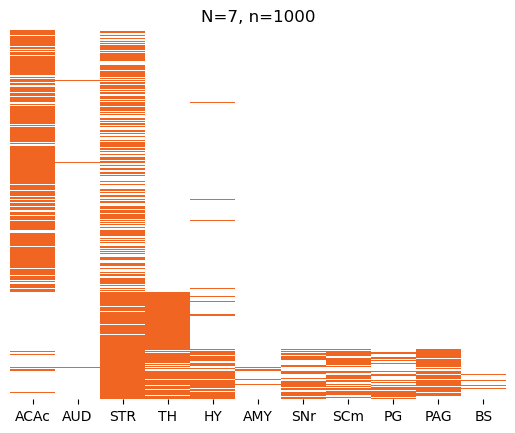

In [21]:
# plot STF6 only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
aca_st = np.take(aca_preprocess, stidx) # just get steg from list
plot_st = pd.concat(aca_st)
sorted_heatmap(plot_st, sort_by=['type'], title="N=7, n=1000", drop=["ACAi", "type"],
               nsample=1000)
plt.show()

# umap/clustering???

# Polar plots

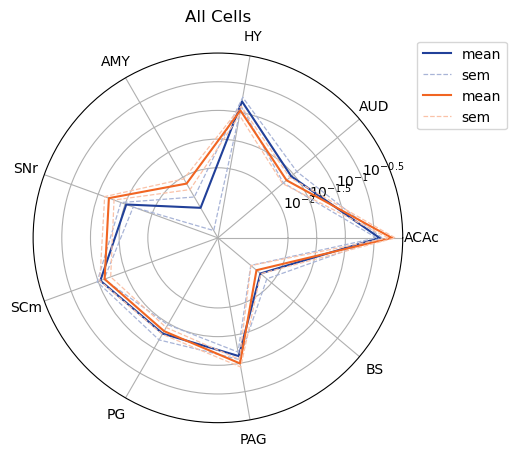

In [23]:
proportion_polar_plot(aca_type, title="All Cells", 
                      drop=["ACAi", "STR", "TH", "type"])
plt.show()

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

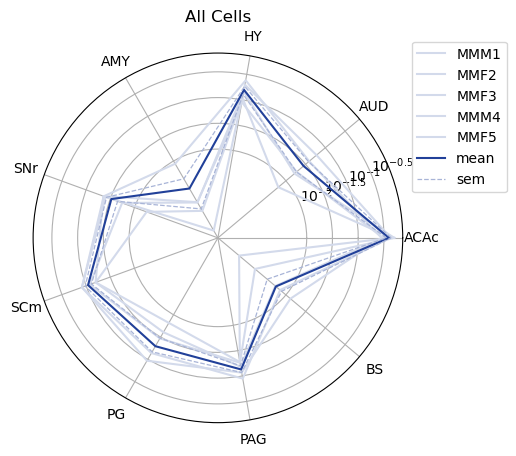

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

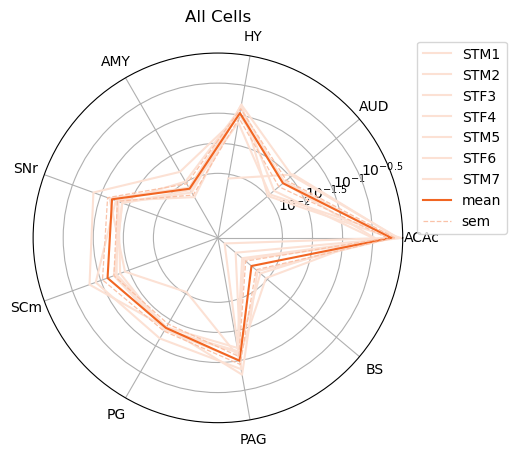

In [24]:
aca_mm = [aca_type[i] for i in range(len(aca_type)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(aca_mm, title="All Cells", plot_individuals=True, meta=meta_mm, drop=["ACAi", "STR", "TH", "type"])
plt.show()

aca_st = [aca_type[i] for i in range(len(aca_type)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(aca_st, title="All Cells", plot_individuals=True, meta=meta_st, drop=["ACAi", "STR", "TH", "type"])
plt.show()

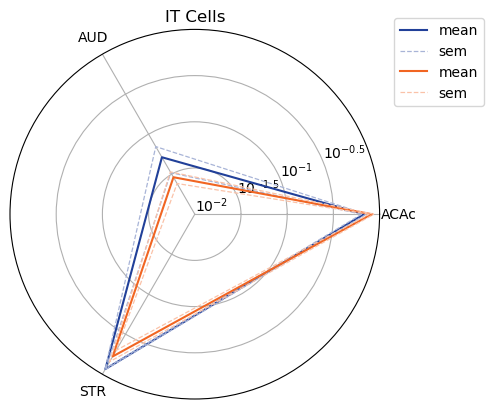

In [26]:
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
proportion_polar_plot(aca_it, title="IT Cells", cell_type="IT", drop=["ACAi", "type"], inj_site="ACAi")
plt.show()


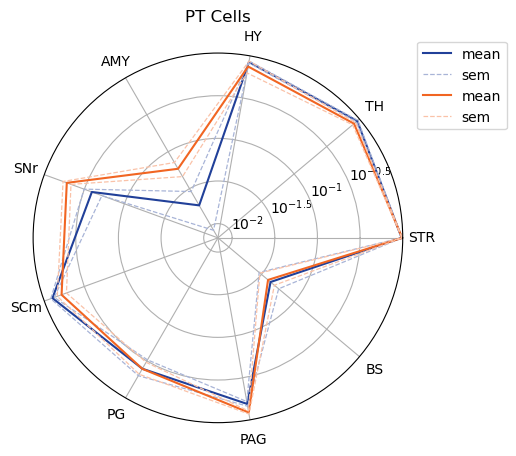

In [30]:
aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
proportion_polar_plot(aca_pt, title="PT Cells", cell_type="PT", drop=["ACAi", "type"], inj_site="ACAi")
plt.show()


# Dot Plots

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


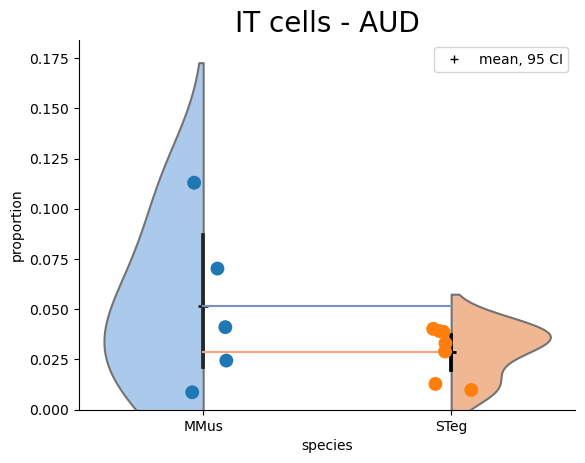

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


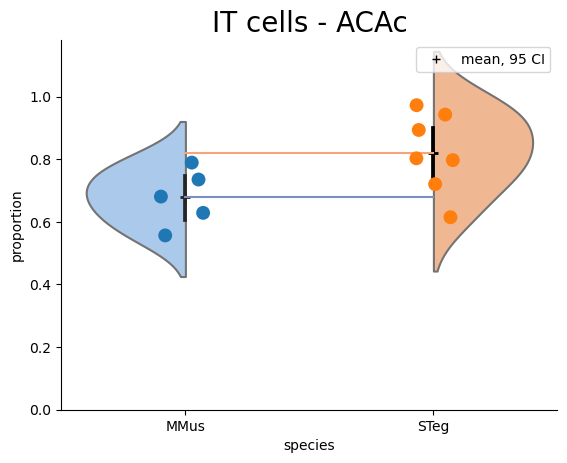

In [32]:
# IT
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
plot_df = dfs_to_proportions(aca_it, cell_type="IT", inj_site="ACAi")

# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD")
plt.show()

# ACAc
area_proportion_dot_plot(plot_df, "ACAc", title="IT cells - ACAc")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


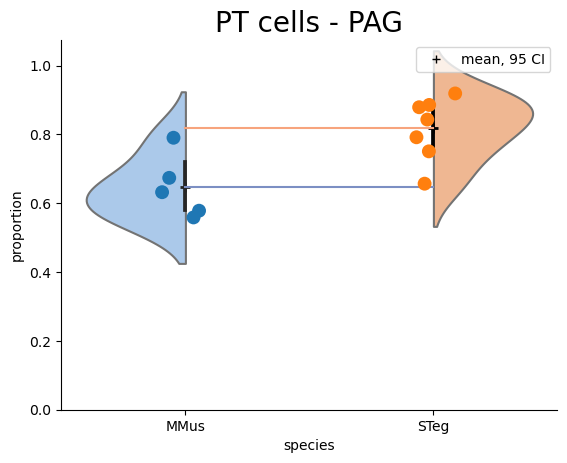

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


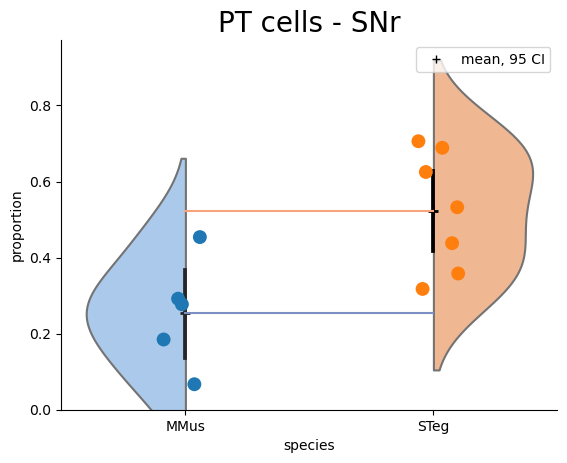

In [33]:

aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
plot_df = dfs_to_proportions(aca_pt, cell_type="PT", inj_site="ACAi")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr")
plt.show()

# Volcano Plots

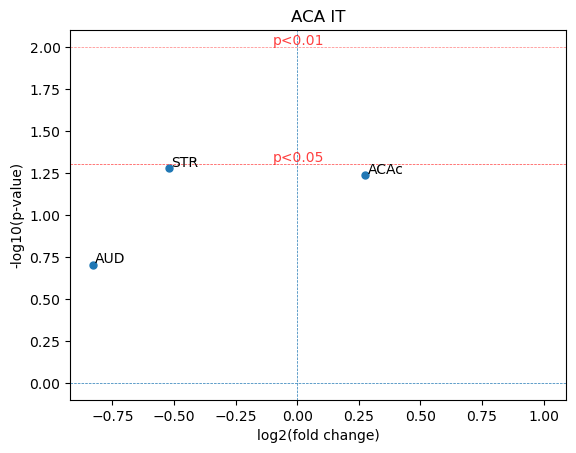

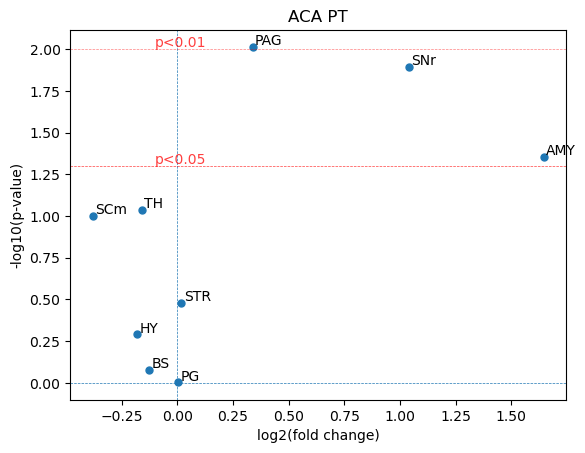

In [34]:
# IT
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
plot_df = dfs_to_proportions(aca_it, cell_type="IT", inj_site="ACAi")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="ACA IT")
plt.show()

# PT
aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
plot_df = dfs_to_proportions(aca_pt, cell_type="PT", inj_site="ACAi")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="ACA PT")
plt.show()

# Fold Change Plots

In [12]:
aca_type[0]

,ACAi,ACAc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS,type
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8516,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,PT
8517,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,PT
8518,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,PT
8519,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,PT


In [6]:
plot = fold_change_calc(aca_type, drop=["ACAi", "type"], inj_site="ACAi")
plot

,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p,type
0,AMY,0.044207,0.018757,0.058679,3.128301,1.645379,1.354505,PT
1,SNr,0.012725,0.254907,0.523609,2.054119,1.038520,1.895355,PT
2,PAG,0.009686,0.646594,0.817957,1.265025,0.339166,2.013837,PT
3,ACAc,0.058136,0.678231,0.820683,1.210035,0.275049,1.235553,IT
4,PG,0.992995,0.402998,0.404081,1.002688,0.003872,0.003053,PT
5,BS,0.832988,0.043505,0.039855,0.916100,-0.126423,0.079361,PT
6,HY,0.508880,0.846069,0.746716,0.882572,-0.180215,0.293385,PT
7,SCm,0.099534,0.791013,0.608250,0.768950,-0.379038,1.002027,PT
8,AUD,0.197924,0.051483,0.028972,0.562739,-0.829463,0.703502,IT


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


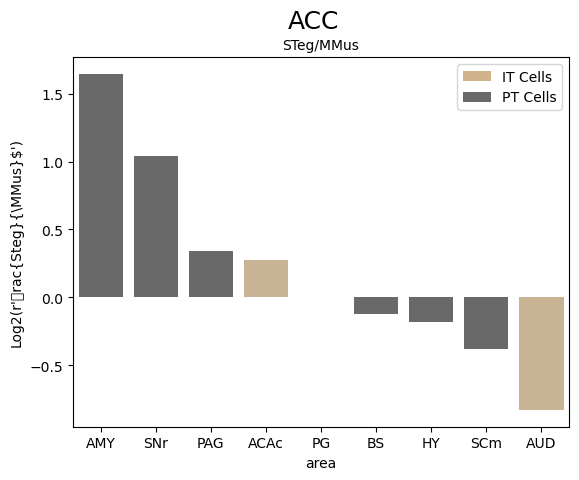

In [15]:
fold_change_ranked(plot, suptitle="ACC", title="STeg/MMus")
plt.show()

In [ ]:
# calculate null fold change...

# Scatterplots

In [5]:
aca_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in aca_type]
aca_it_prop = dfs_to_proportions(aca_it, cell_type="IT", drop=["ACAi", "type"], inj_site="ACAi")
aca_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in aca_type]
aca_pt_prop = dfs_to_proportions(aca_pt, cell_type="PT", drop=["ACAi", "type"], inj_site="ACAi")
aca_pt_prop


,area,proportion,mice,species,dataset
0,STR,0.992806,MMM1,MMus,M194
1,TH,0.925659,MMM1,MMus,M194
2,HY,0.893285,MMM1,MMus,M194
3,AMY,0.011990,MMM1,MMus,M194
4,SNr,0.184652,MMM1,MMus,M194
...,...,...,...,...,...
4,SNr,0.688581,STM7,STeg,M220
5,SCm,0.806228,STM7,STeg,M220
6,PG,0.228374,STM7,STeg,M220
7,PAG,0.878893,STM7,STeg,M220


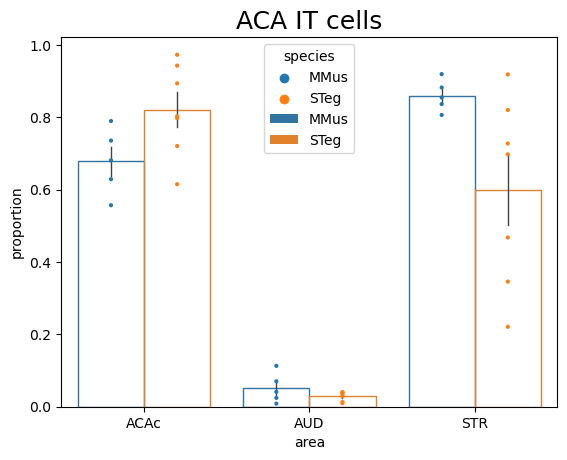

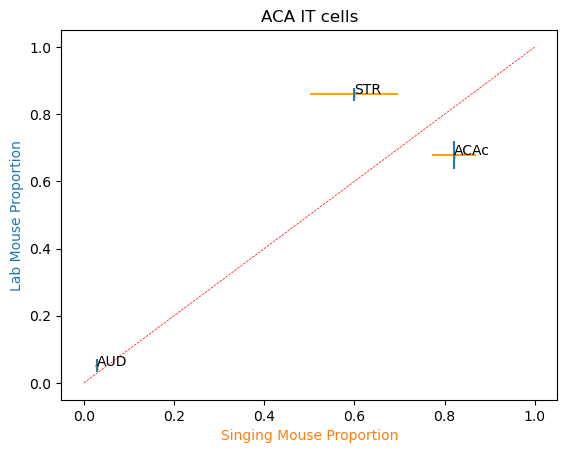

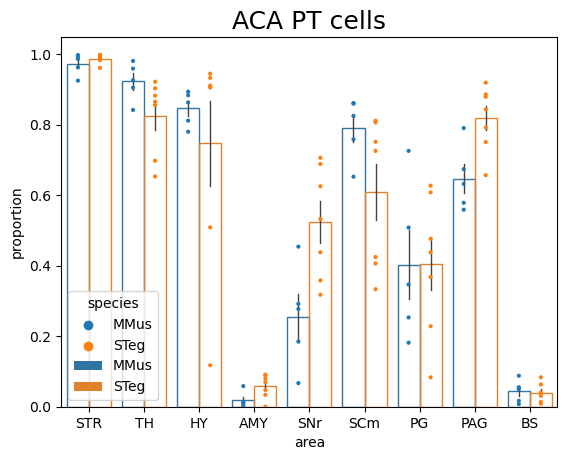

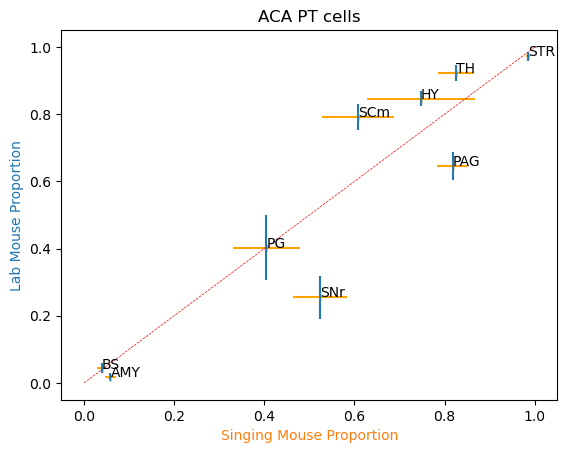

In [9]:

dot_bar_plot(aca_it_prop, title="ACA IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(aca_it_prop, title="ACA IT cells")
plt.show()

dot_bar_plot(aca_pt_prop, title="ACA PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()
stvmm_area_scatter(aca_pt_prop, title="ACA PT cells")
plt.show()




## Standard deviation vs. sem


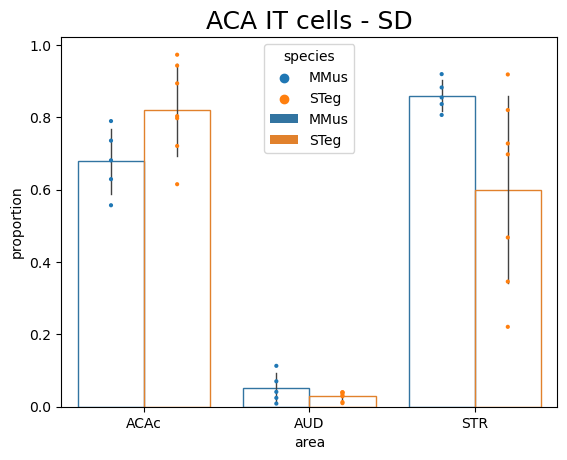

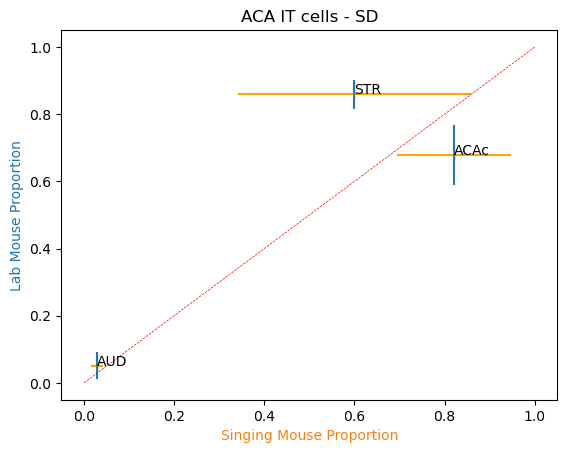

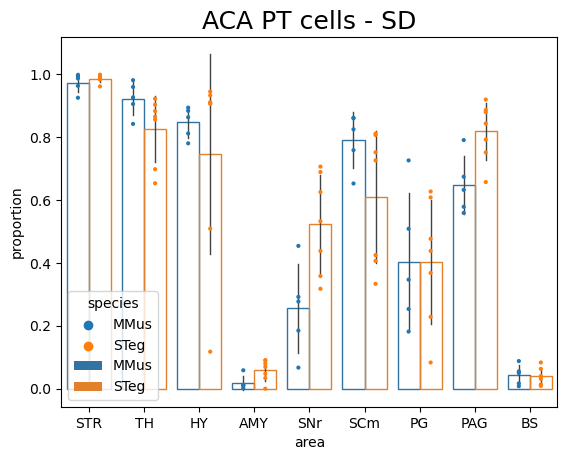

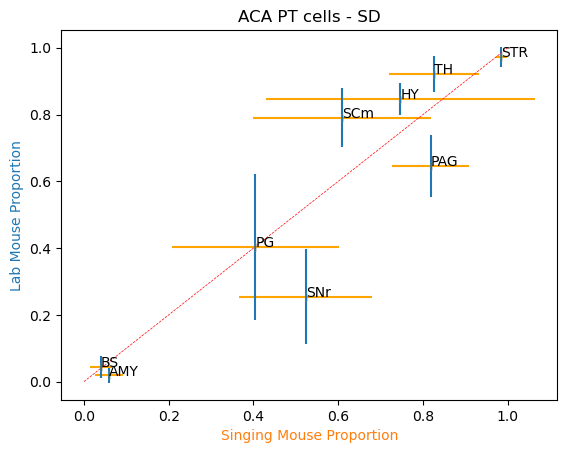

In [11]:

dot_bar_plot(aca_it_prop, title="ACA IT cells - SD", xaxis="area", yaxis="proportion", hueaxis="species",
             errorbar="sd")
plt.show()
stvmm_area_scatter(aca_it_prop, title="ACA IT cells - SD", err="std")
plt.show()

dot_bar_plot(aca_pt_prop, title="ACA PT cells - SD", xaxis="area", yaxis="proportion", hueaxis="species",
             errorbar="sd")
plt.show()
stvmm_area_scatter(aca_pt_prop, title="ACA PT cells - SD", err="std")
plt.show()

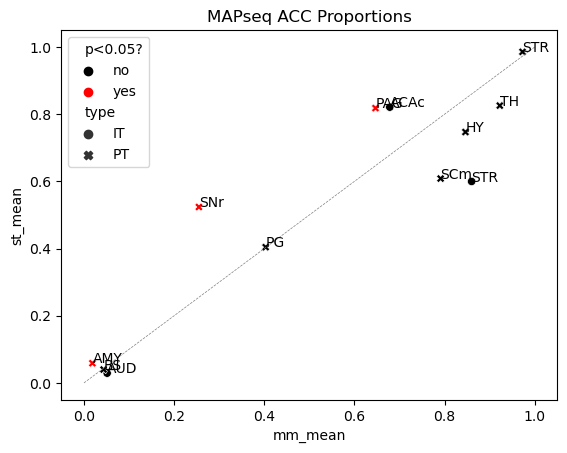

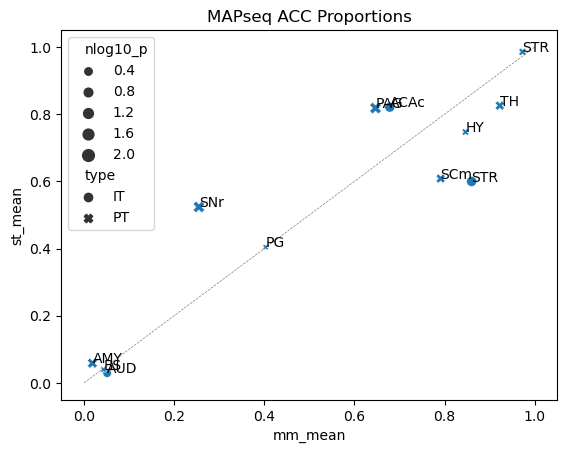

In [7]:
it_tt = proportion_ttest(aca_it_prop)
it_tt['type'] = "IT"
pt_tt = proportion_ttest(aca_pt_prop)
pt_tt['type'] = "PT"

omc_tt = pd.concat([it_tt, pt_tt])
omc_tt['p<0.05'] = omc_tt['p-value']<0.05
omc_tt
plot = omc_tt.reset_index(drop=True)

for i in range(plot.shape[0]):
    if plot.loc[i,"p<0.05"]:
        plot.loc[i, "p<0.05?"] = "yes"
    else:
        plot.loc[i,"p<0.05?"] = "no"

plot
xy = np.linspace(0,1,5)
plt.plot(xy, xy, color='grey', linestyle="--", linewidth=0.5)

sns.scatterplot(data = plot,
                x="mm_mean",
                y="st_mean",
                style="type",
                hue='p<0.05?',
                palette=dict(yes="red", no="black")
                )
 # add area labels
labels = list(plot['area'])
for i in range(len(labels)):
    # print( plot.loc[i,'mm_mean'])
    # print(i)
    plt.annotate(labels[i], (plot.loc[i,'mm_mean'], plot.loc[i,'st_mean']))

plt.title("MAPseq ACC Proportions")

plt.show()

xy = np.linspace(0,1,5)
plt.plot(xy, xy, color='grey', linestyle="--", linewidth=0.5)

sns.scatterplot(data = plot,
                x="mm_mean",
                y="st_mean",
                style="type",
                size='nlog10_p',
                )
 # add area labels
labels = list(plot['area'])
for i in range(len(labels)):
    # print( plot.loc[i,'mm_mean'])
    # print(i)
    plt.annotate(labels[i], (plot.loc[i,'mm_mean'], plot.loc[i,'st_mean']))
plt.title("MAPseq ACC Proportions")

plt.show()


Text(0.5, 1.0, 'ACC MAPseq proportions')

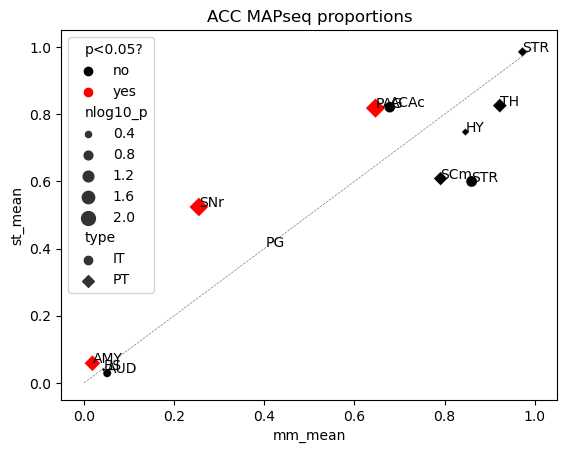

In [8]:

xy = np.linspace(0,1,5)
plt.plot(xy, xy, color='grey', linestyle="--", linewidth=0.5)


sns.scatterplot(data = plot,
                x="mm_mean",
                y="st_mean",
                style="type",
                size='nlog10_p',
                markers=["o", "D"],
                sizes=(0,100),
                hue='p<0.05?',
                palette=dict(yes="red", no="black")
                )
 # add area labels
labels = list(plot['area'])
for i in range(len(labels)):
    # print( plot.loc[i,'mm_mean'])
    # print(i)
    plt.annotate(labels[i], (plot.loc[i,'mm_mean'], plot.loc[i,'st_mean']))
plt.title("ACC MAPseq proportions")
